PSNR: 13.481575544305338 dB
Quality: 9.171 JOD


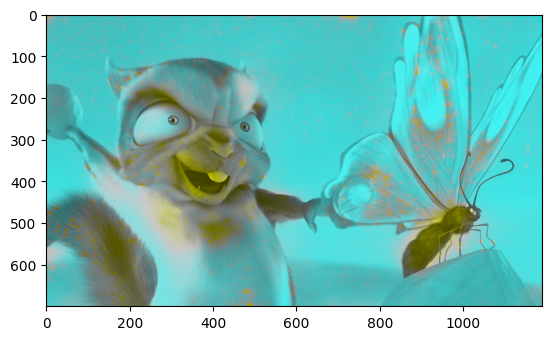

In [10]:
import cv2
import numpy as np
import pycvvdp
import matplotlib.pyplot as plt
import torch

def calculate_psnr(image1, image2):
    if image1.shape != image2.shape:
        raise ValueError("Input images must have the same dimensions.")
    
    image1 = image1.astype(np.float32)
    image2 = image2.astype(np.float32)
    
    mse = np.mean((image1 - image2) ** 2)
    
    if mse == 0:
        return float('inf')
    
    max_pixel = 255.0
    
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

image1_path = "../results/_SGD_rgb_ASM_5000_recon_1.0_None_0.0_random_tm_1_cvvdp_loss/0_recon.png"
image2_path = "../results/_SGD_rgb_ASM_5000_recon_1.0_None_0.0_random_tm_1_cvvdp_loss/0_target.png"
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

psnr_value = calculate_psnr(image1, image2)
print(f"PSNR: {psnr_value} dB")

I_ref = pycvvdp.load_image_as_array(image1_path)
I_test = pycvvdp.load_image_as_array(image2_path)
I_ref = (I_ref/255.0).astype(np.float32)
I_test = (I_test/255.0).astype(np.float32)
I_ref = I_ref*100.0
I_test = I_test*100.0

L_peak = 100
source_type = 'Laser'
disp_photo = pycvvdp.vvdp_display_photo_eotf(L_peak, source_colorspace=source_type)

metric = pycvvdp.cvvdp(display_name='my_display',display_photometry=disp_photo, heatmap='supra-threshold')
Q_JOD, stats = metric.predict( I_test, I_ref, dim_order="HWC" )
cvvdp_str = f'Quality: {Q_JOD:.3f} JOD'
print( cvvdp_str )

plt.imshow( stats['heatmap'][0,:,0,:,:].permute([1,2,0]).to(torch.float32).numpy() )
plt.show()